These exercises are part of practice in Chaperter 6 "Machine Learning", of online courses "Become a data scientist" [www.dataquest.io](https://www.dataquest.io/) 

# K-mean

In [13]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
votes = pd.read_csv('../../../dataquest/datafile/6-5-5-114_congress.csv')
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [4]:
print(votes.shape)

(100, 18)


In [5]:
print(votes['party'].value_counts())

R    54
D    44
I     2
Name: party, dtype: int64


In [6]:
# example of euclidean-distance calculations
print(euclidean_distances(votes.iloc[0,3:].values.reshape(1,-1), 
                          votes.iloc[2,3:].values.reshape(1,-1)))

[[ 3.31662479]]


## KMeans.fit_transform fit cluster centers and distances of data to each center
dataframe with each rows represents samples, columns represents features

In [52]:
# 2 cluster fitting, use fit_transform to calculate the distances of senators to each center
model = KMeans(n_clusters=2, random_state=1)
senator_distances = model.fit_transform(votes.iloc[:,3:])
print(senator_distances[:5])   # (1st, 2nd) columns: distances to (1st, 2nd) center

[[ 3.12141628  1.3134775 ]
 [ 2.6146248   2.05339992]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 1.43833966  2.96866004]]


In [10]:
print(model.labels_)
print(len(model.labels_))

[1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1
 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0
 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0]
100


## pd.crosstab() compares cluster 'labels' to values of a column 

In [11]:
print(pd.crosstab(model.labels_, votes['party']))

party   D  I   R
row_0           
0      41  2   0
1       3  0  54


So, 41 'D' and 2 'I' are in 1st cluster, 3 'D' and 54 'R' are in second cluster 

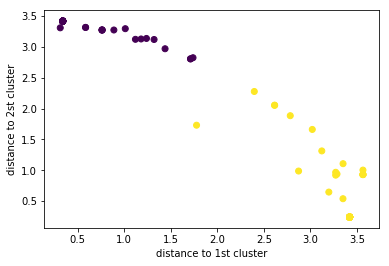

In [14]:
labels = model.labels_
plt.scatter(x=senator_distances[:,0], y=senator_distances[:,1], c=labels)
plt.xlabel('distance to 1st cluster')
plt.ylabel('distance to 2st cluster');

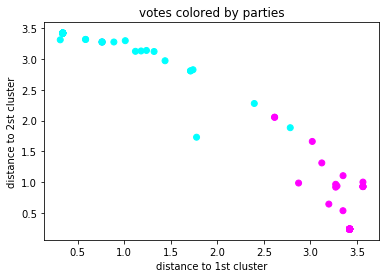

In [32]:
# could not color the 3 parties, only showing 2 colors. Why??? (tried mulitple cmap, and ...)
# probably the 2 'I's were overlapped by other colors.
labels = model.labels_
plt.scatter(x=senator_distances[:,0], y=senator_distances[:,1], 
            c=votes['party'].astype('category').values.codes, cmap='cool')
plt.xlabel('distance to 1st cluster')
plt.ylabel('distance to 2st cluster')
plt.title('votes colored by parties');

In [53]:
print(votes[votes['party']=='I'].index.values)

[50 79]


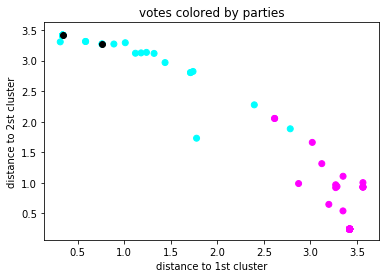

In [54]:
# to avoid overlapping, plot the 2 independent votes after plotting the others:
I_index = votes[votes['party']=='I'].index.values
DR_index = votes[votes['party'] != 'I'].index.values
plt.scatter(x=senator_distances[DR_index,0], y=senator_distances[DR_index,1], 
            c=votes['party'].astype('category').values.codes[DR_index], cmap='cool')
plt.scatter(x=senator_distances[I_index,0], y=senator_distances[I_index,1], 
            c='k')
plt.xlabel('distance to 1st cluster')
plt.ylabel('distance to 2st cluster')
plt.title('votes colored by parties');

In [34]:
# find out the names of 3 'outlier" democrates:
print(votes[(labels==1) & (votes['party']=='D')]['name'])

42    Heitkamp
56     Manchin
74        Reid
Name: name, dtype: object


In [47]:
# who is party loyalty or extreme? are closest to a cluster ceter is same as furthest to another?
votes['close'] = np.min(senator_distances, axis=1)
votes['far away'] = np.max(senator_distances, axis=1)
votes.sort_values('close', inplace=True, ascending=True)
print(votes.head(30))
names1 = votes.head(30)['name']
votes.sort_values('far away', inplace=True, ascending=False)
print(votes.head(30))
names2 = votes.head(30)['name']

          name party state  00001  00004  00005  00006  00007  00008  00009  \
45      Hoeven     R    ND    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
15      Carper     D    DE    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
25       Crapo     R    ID    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
37  Gillibrand     D    NY    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
27      Daines     R    MT    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
40       Hatch     R    UT    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
20     Collins     R    ME    0.0    1.0    1.0    1.0    1.0    0.0    0.0   
3     Barrasso     R    WY    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
31       Ernst     R    IA    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
89      Tester     D    MT    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
33     Fischer     R    NE    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
8      Boozman     R    AR    0.0    1.0    1.0    1

In [48]:
same_names = list(set(names1) & set(names2))
print(same_names)

['Lee', 'Murphy', 'Cardin', 'Boozman', 'Ayotte', 'Gillibrand', 'Sullivan', 'Crapo', 'Collins', 'Hoeven', 'Boxer', 'Baldwin', 'Blumenthal', 'Blunt', 'Daines', 'Hatch', 'Carper']


 This method does not work!!! Too many senators voted with the same closeset distance to one cluster !!!. But it seams to tell the the smallest distance to one cluster is not furthest to another cluster, therefore there is no good way to judge 'extremes' with these data.

The instructor use the sum of distances to both parties to identify "extremism" for partism, that does not make sence to me!

__________________
# Visualizing the process of k-mean learning
Initialize k positions in data. Plotting the data clustering with different color during each loop of learning. <br>
skip the coding. See lecture for details

In [49]:
nba = pd.read_csv('../../../dataquest/datafile/6-5-6-nba_2013.csv')

In [50]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
